# Read

In [14]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np

In [2]:
df = pd.read_csv('..\\data\\Data_Entry_2017.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
image_folders = [f'../data/images_{str(i).zfill(3)}' for i in range(1, 13)]


# Looking at labels

In [4]:
df.shape

(112120, 12)

In [5]:
label_counts = {}

# Loop through each row in the Finding Labels
for labels in df['Finding Labels']:
    individual_labels = labels.split('|')  # split on '|'
    for label in individual_labels:
        if label in label_counts:
            label_counts[label] += 1  # add 1 if already counted
        else:
            label_counts[label] = 1   # start counter at 1 if first time

label_df = pd.DataFrame(list(label_counts.items()), columns=['Finding', 'Count'])
label_df = label_df.sort_values('Count', ascending=False)

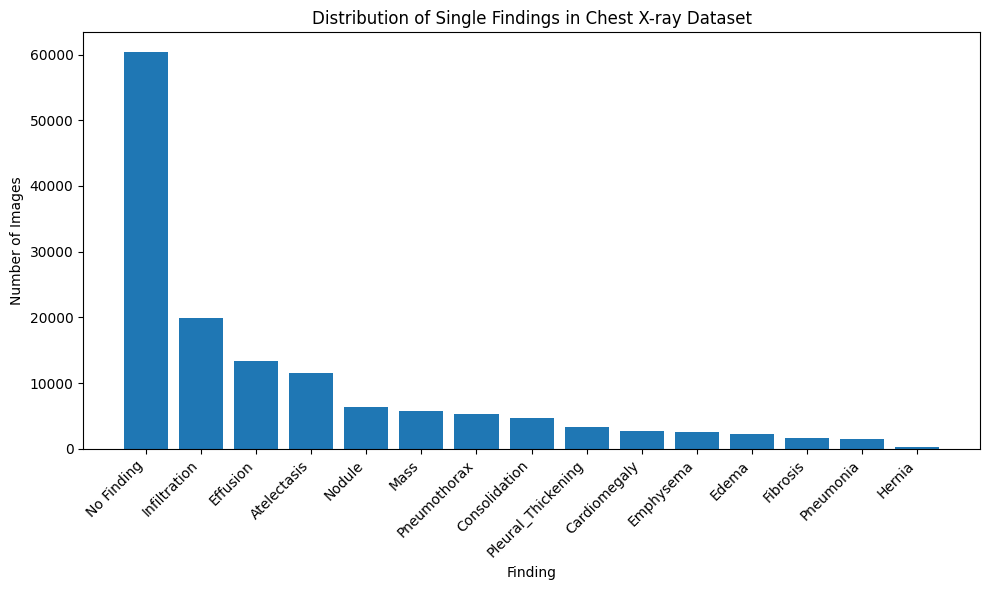

In [6]:
plt.figure(figsize=(10,6))
plt.bar(label_df['Finding'], label_df['Count'])
plt.title('Distribution of Single Findings in Chest X-ray Dataset')
plt.xlabel('Finding')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most instances are no-findings, so many healthy controls

Dataset is rather imbalanced. Diseases like Infiltration, Effusion, and Atelectasis are relatively common, while conditions such as Hernia and Fibrosis are rare.
This class imbalance needs to be considered during model training, as models could otherwise become biased toward the majority class.

# Sample images

In [ ]:
def find_image(image_name: str) -> str:
    for folder in image_folders:
        full_path = f'{folder}/images/{image_name}' 
        if os.path.exists(full_path):
            return full_path
    print(f"Image {image_name} not found!")
    return None

In [8]:
# random sample 9 images for 3x3 grid
rows = []
for id, row in df.iterrows():
    path = find_image(row['Image Index'])
    if path is not None:
        rows.append(row)

df_sampling = pd.DataFrame(rows)
sample_rows = df_sampling.sample(9)

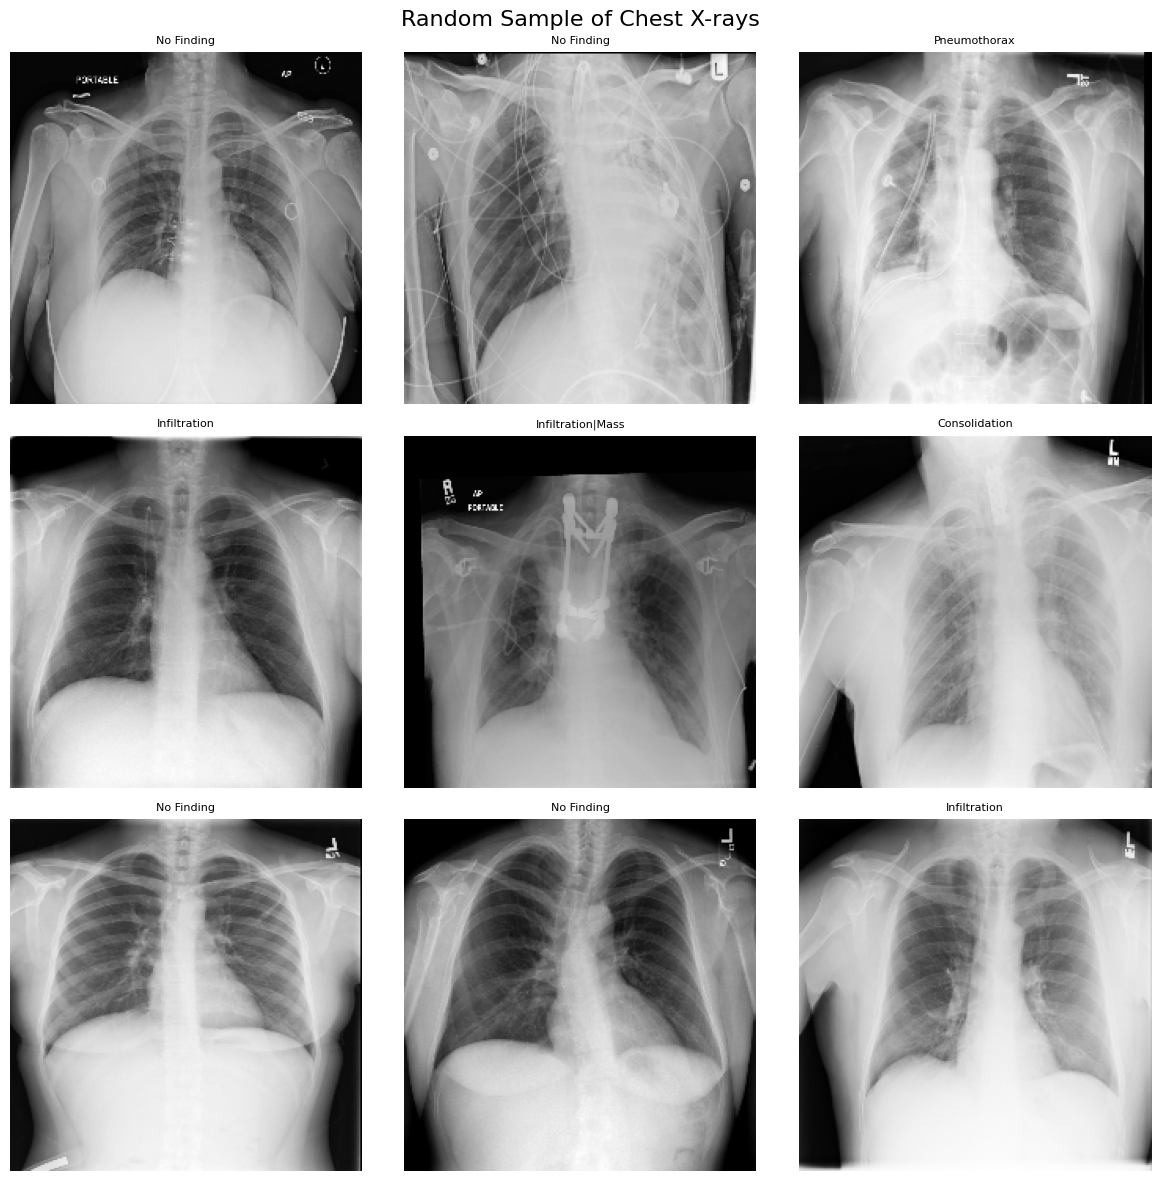

In [9]:
# plotting
plt.figure(figsize=(12, 12))
for idx, (_, row) in enumerate(sample_rows.iterrows()):
    img_path = find_image(row['Image Index'])
    if img_path is not None:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        plt.subplot(3, 3, idx+1)
        plt.imshow(img, cmap='gray')
        plt.title(row['Finding Labels'], fontsize=8)
        plt.axis('off')
plt.suptitle('Random Sample of Chest X-rays', fontsize=16)
plt.tight_layout()
plt.show()

Random sample of chest X-ray images from the NIH Chest X-ray dataset.
Images include both "No Finding" (normal) and various disease conditions such as Infiltration, Pneumothorax, and Consolidation.
Notable variability in image quality, exposure, and patient positioning can be observed, which may impact model training.

# pixels

In [10]:
heights = []
widths = []

In [11]:
sample2 = df_sampling.sample(1000)
for id, row in sample_rows.iterrows():
    img_path = find_image(row['Image Index'])
    if img_path is not None:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        h, w = img.shape
        heights.append(h)
        widths.append(w)

In [19]:
print("Most common height:", np.bincount(heights).argmax())
print("Most common width:", np.bincount(widths).argmax())

Most common height: 1024
Most common width: 1024


Will need to resize to 224x224 probably

# Quick comparison healthy to unhealthy

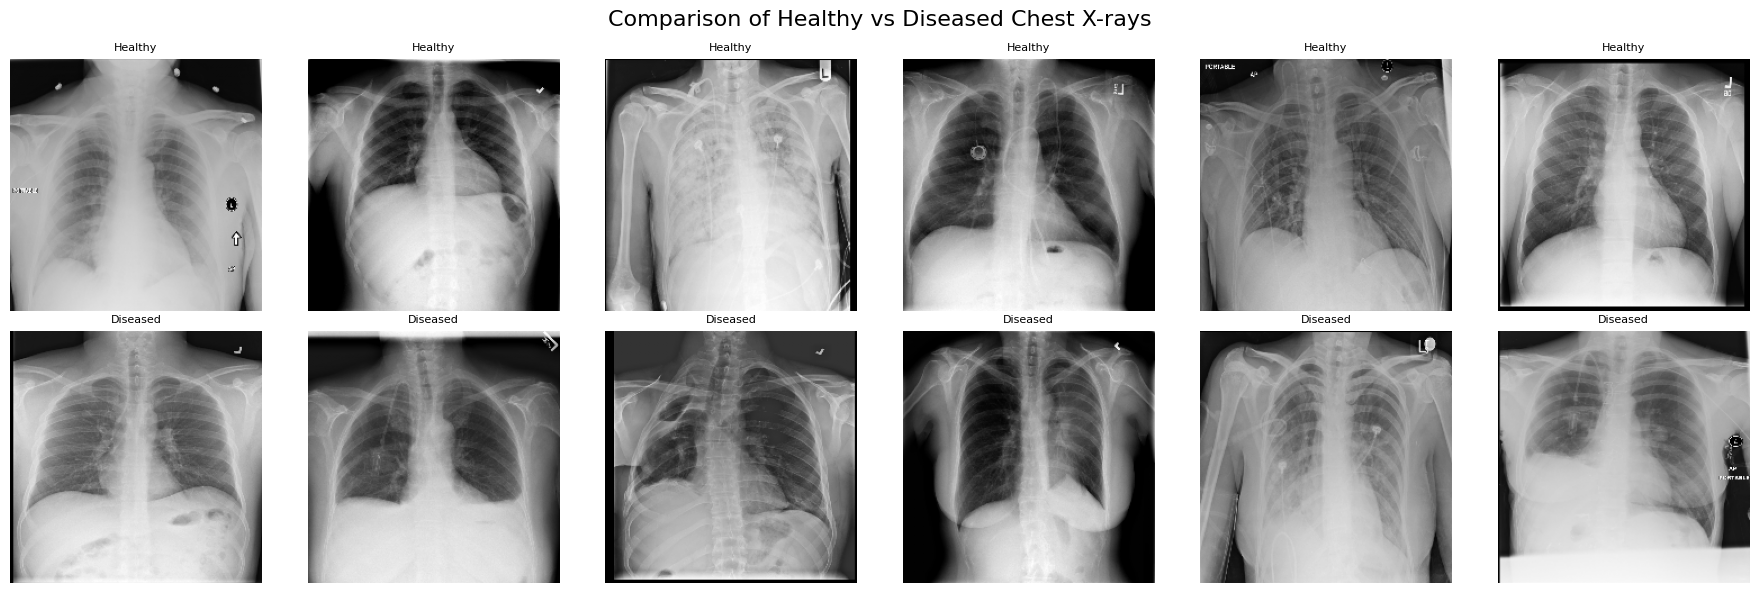

In [23]:
# 1. Find healthy images
healthy_df = df_sampling[df_sampling['Finding Labels'] == 'No Finding']

# 2. Find diseased images (anything that's NOT "No Finding")
diseased_df = df_sampling[df_sampling['Finding Labels'] != 'No Finding']

# 3. Randomly sample
healthy_samples = healthy_df.sample(6)
diseased_samples = diseased_df.sample(6)

# 4. Plot
plt.figure(figsize=(18,6))

# Plot healthy
for idx, (_, row) in enumerate(healthy_samples.iterrows()):
    img_path = find_image(row['Image Index'])
    if img_path is not None:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        plt.subplot(2, 6, idx+1)
        plt.imshow(img, cmap='gray')
        plt.title('Healthy', fontsize=8)
        plt.axis('off')

# Plot diseased
for idx, (_, row) in enumerate(diseased_samples.iterrows()):
    img_path = find_image(row['Image Index'])
    if img_path is not None:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        plt.subplot(2, 6, idx+7)  # 6 slots for healthy first, now start at 7
        plt.imshow(img, cmap='gray')
        plt.title('Diseased', fontsize=8)
        plt.axis('off')

plt.suptitle('Comparison of Healthy vs Diseased Chest X-rays', fontsize=16)
plt.tight_layout()
plt.show()